# CNN para MNIST

By Kevin Vu, Exxact Corp.


https://www.kdnuggets.com/2020/10/building-neural-networks-pytorch-google-colab.html

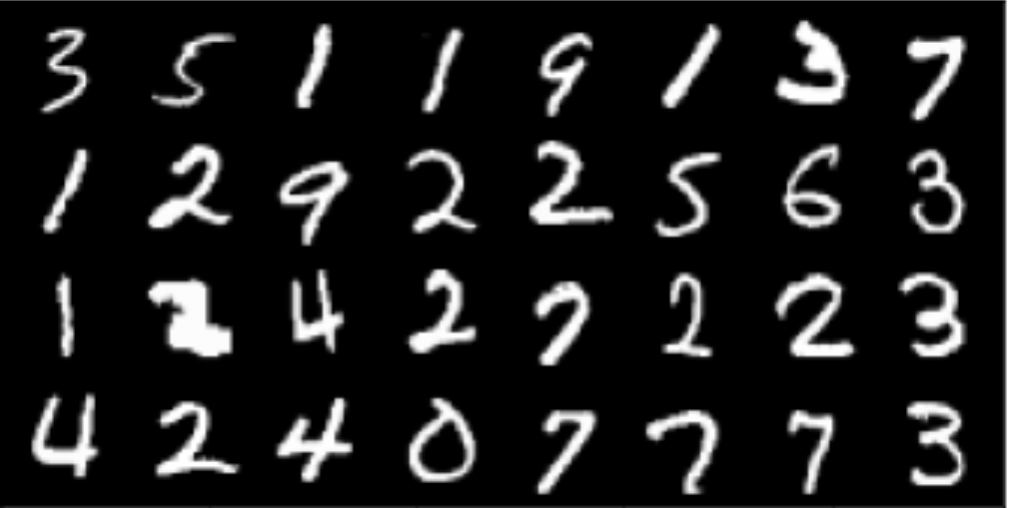

In [ ]:
# Import libraries
import torch
import torchvision
from   torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from   tqdm.auto import tqdm


# Create test and training sets
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


# This section will shuffle our input/training data so that we have a randomized shuffle of our data and do not risk feeding data with a pattern. Anorther objective here is to send the data in batches. This is a good step to practice in order to make sure the neural network does not overfit our data. NN’s are too prone to overfitting just because of the exorbitant amount of data that is required. For each batch size, the neural network will run a back propagation for new updated weights to try and decrease loss each time.
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


# Initialize our neural net
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()

print(net)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Calculate our loss 
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in tqdm(range(5)): # we use 5 epochs
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.

        net.zero_grad()  # sets gradients to 0 before calculating loss.

        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm, -1 is needed to show that output can be n-dimensions. This is PyTorch exclusive syntax)

        loss = F.nll_loss(output, y)  # calc and grab the loss value

        loss.backward()  # apply this loss backwards thru the network's parameters

        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print('Loss after epoch '+str(epoch)+': ',loss)  



Loss after epoch 0:  tensor(0.4857, grad_fn=<NllLossBackward>)
Loss after epoch 1:  tensor(0.2228, grad_fn=<NllLossBackward>)
Loss after epoch 2:  tensor(0.1829, grad_fn=<NllLossBackward>)
Loss after epoch 3:  tensor(0.0738, grad_fn=<NllLossBackward>)
Loss after epoch 4:  tensor(1.2605, grad_fn=<NllLossBackward>)



In [ ]:

# Get the Accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

### Output: 
### Accuracy:  0.915

Accuracy:  0.907
